In [22]:
%matplotlib inline
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from scribe_classifier.data.canada import AllCodes, TitleSet, SimpleModel, CombinedModels
from sklearn import metrics
import numpy as np

In [10]:
all_codes = AllCodes.load_from_pickle("./source_data/pickles/canada/tidy_sets/all_codes.P", is_path=True)
emptyset_label = "NA"
test = dict()
train = dict()
valid = dict()
mdl = dict()
valid_preds = dict()
test_preds = dict()
for i in range(1,4):
    target_level = i

    test[i] = TitleSet.load_from_pickle('source_data/pickles/canada/test_sets/test.set.lvl%d.P' % target_level, is_path=True)
    valid[i] = TitleSet.load_from_pickle('source_data/pickles/canada/test_sets/valid.set.lvl%d.P' % target_level, is_path=True)
    train[i] = TitleSet.load_from_pickle('source_data/pickles/canada/test_sets/train.set.lvl%d.P' % target_level, is_path=True)

    valid[i] = valid[i].copy_and_append_empty_string_class(label=emptyset_label, prop_records=0.25)
    test[i] = test[i].copy_and_append_empty_string_class(label=emptyset_label, prop_records=0.25)
    mdl[i] = SimpleModel.load_from_pickle(
        "./source_data/pickles/canada/trained_models/simple.lvl%d.P" % target_level,
        is_path=True
    )
    valid_preds[i] = mdl[i].predict_titleset(valid[i])
    test_preds[i] = mdl[i].predict_titleset(test[i])

In [12]:
valid_conf_mats = dict()
test_conf_mats = dict()
for i in range(1,4):
    vY=valid[i].get_code_vec(target_level=i)
    tY=test[i].get_code_vec(target_level=i)
    valid_conf_mats[i] = metrics.confusion_matrix(vY, valid_preds[i]) 
    test_conf_mats[i] = metrics.confusion_matrix(tY, test_preds[i]) 

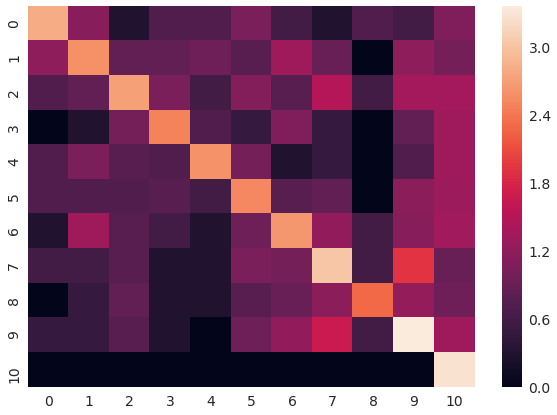

In [25]:
df_cm = pd.DataFrame(np.log10(np.add(test_conf_mats[1],1)))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
# sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
sn.heatmap(df_cm)

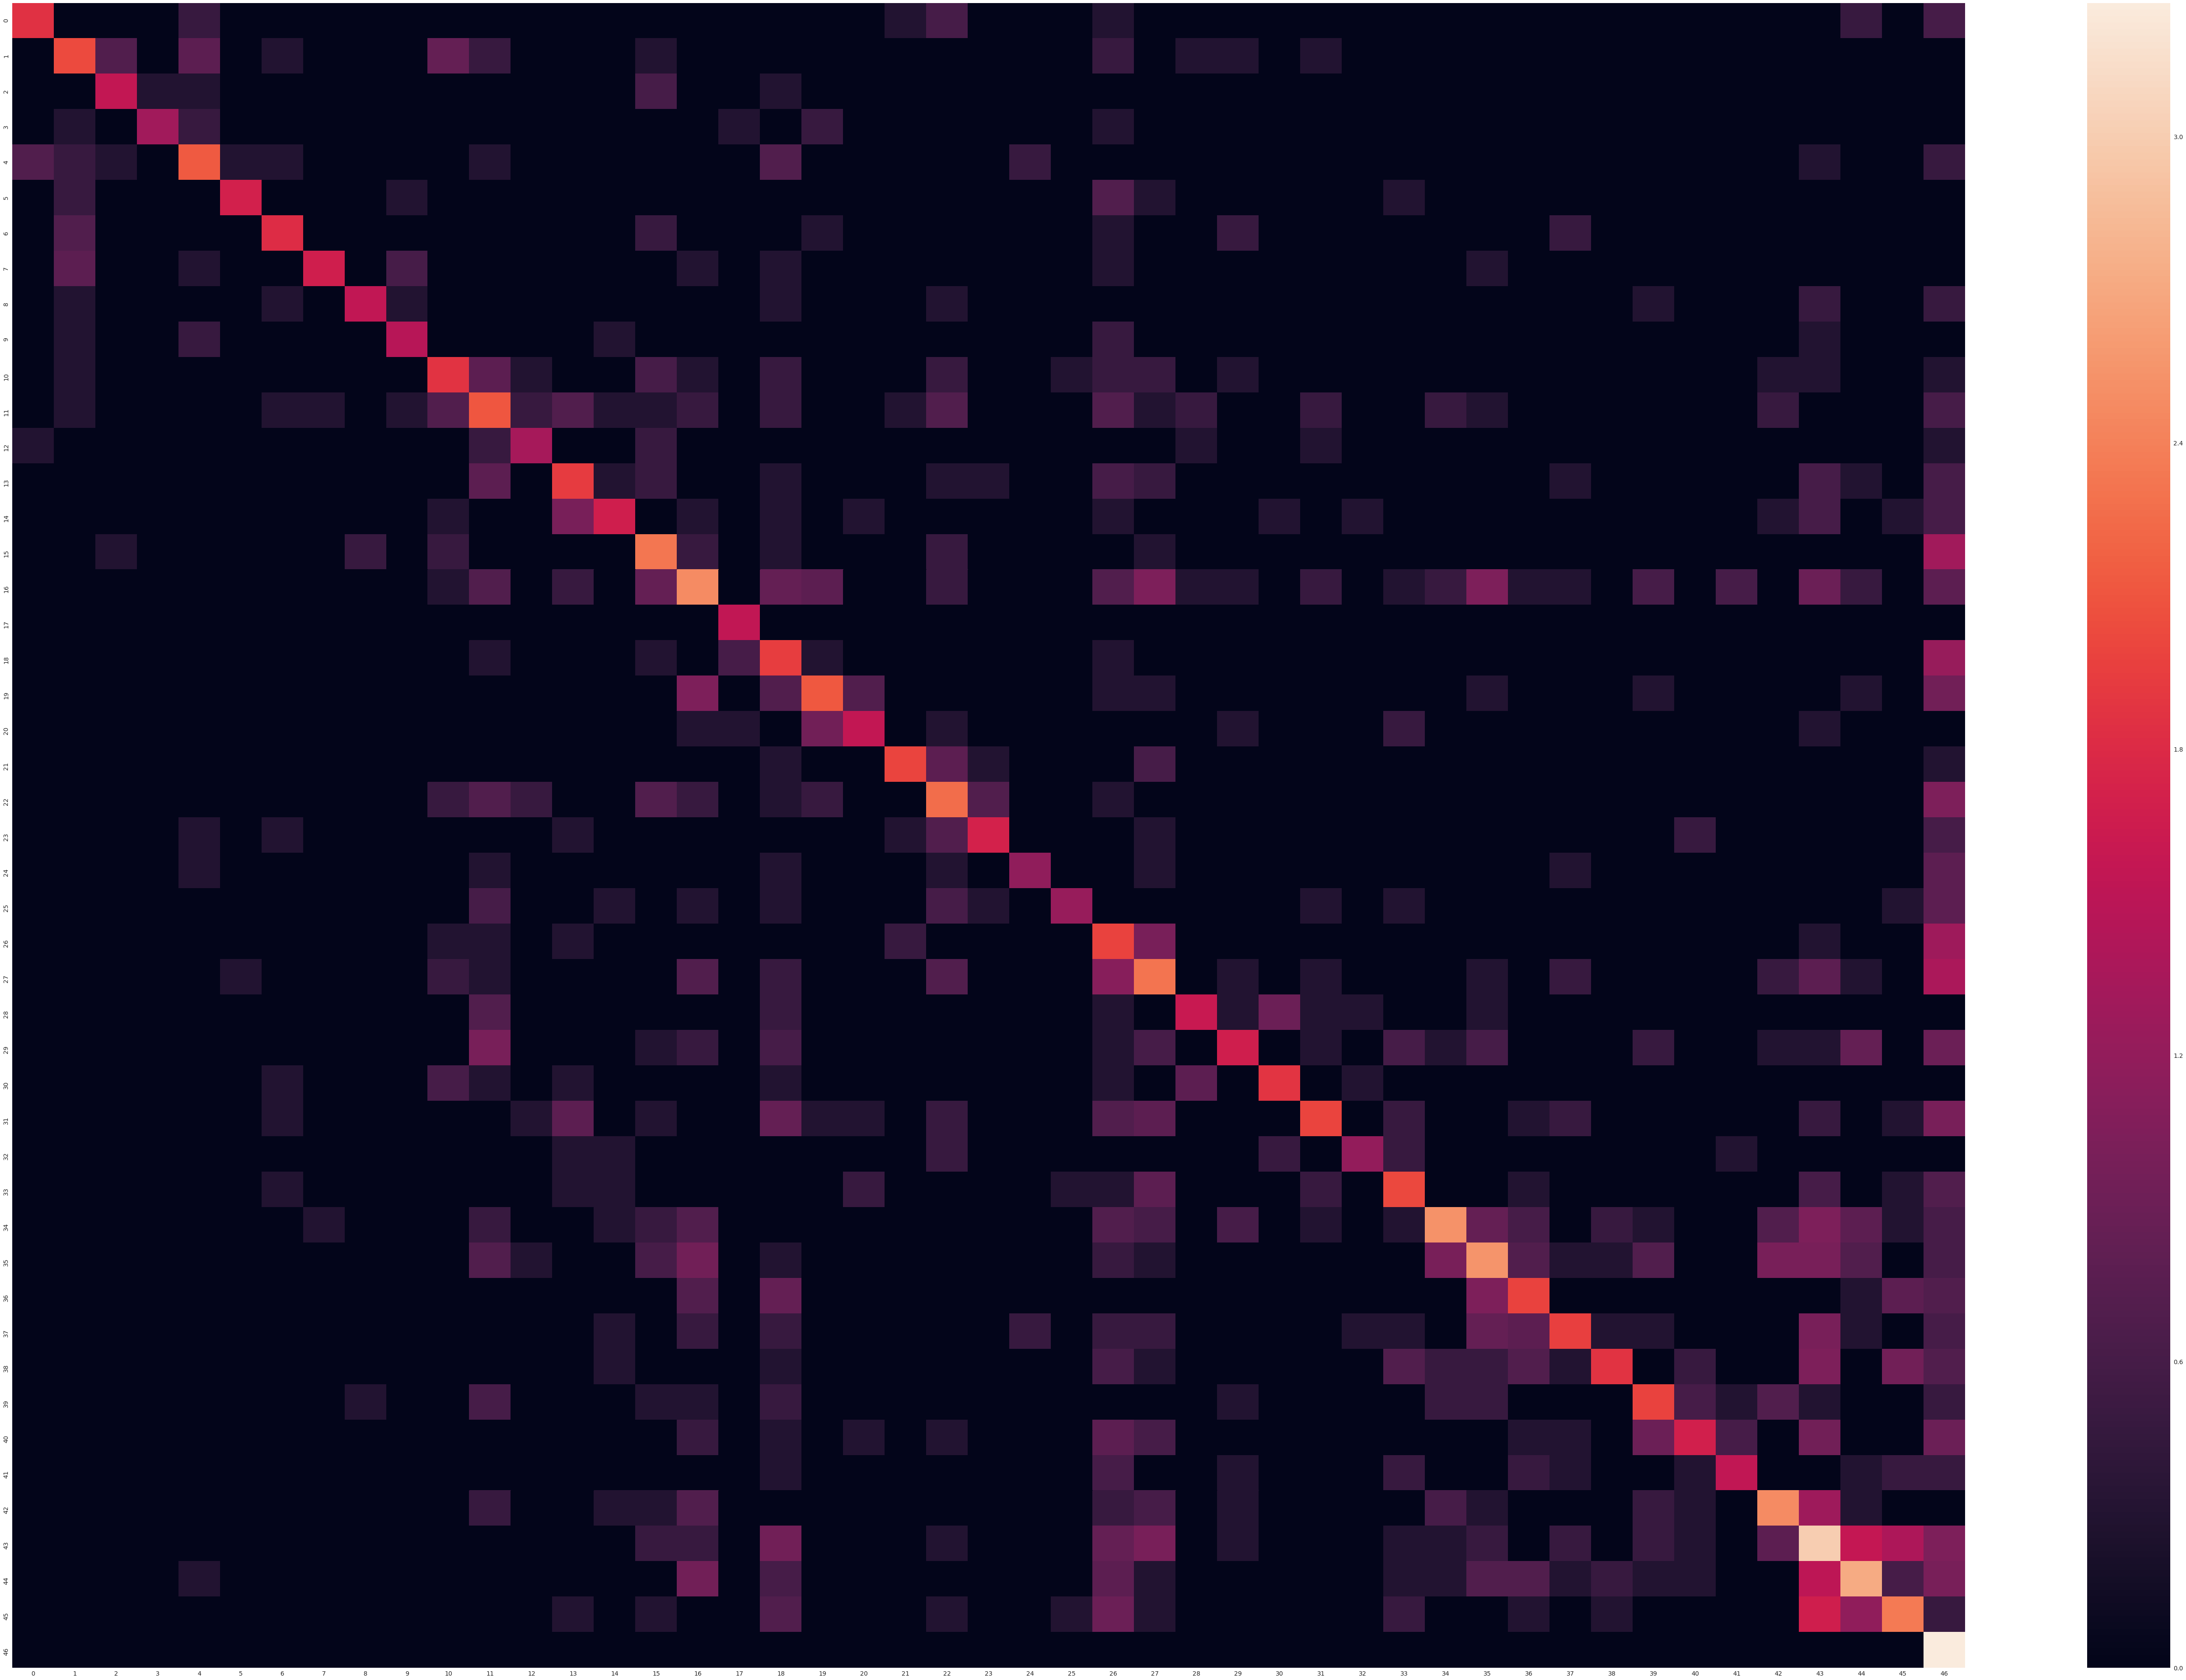

In [23]:
df_cm = pd.DataFrame(np.log10(np.add(test_conf_mats[2],1)))
plt.figure(figsize = (100,70))
sn.set(font_scale=1.4)#for label size
# sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
sn.heatmap(df_cm)

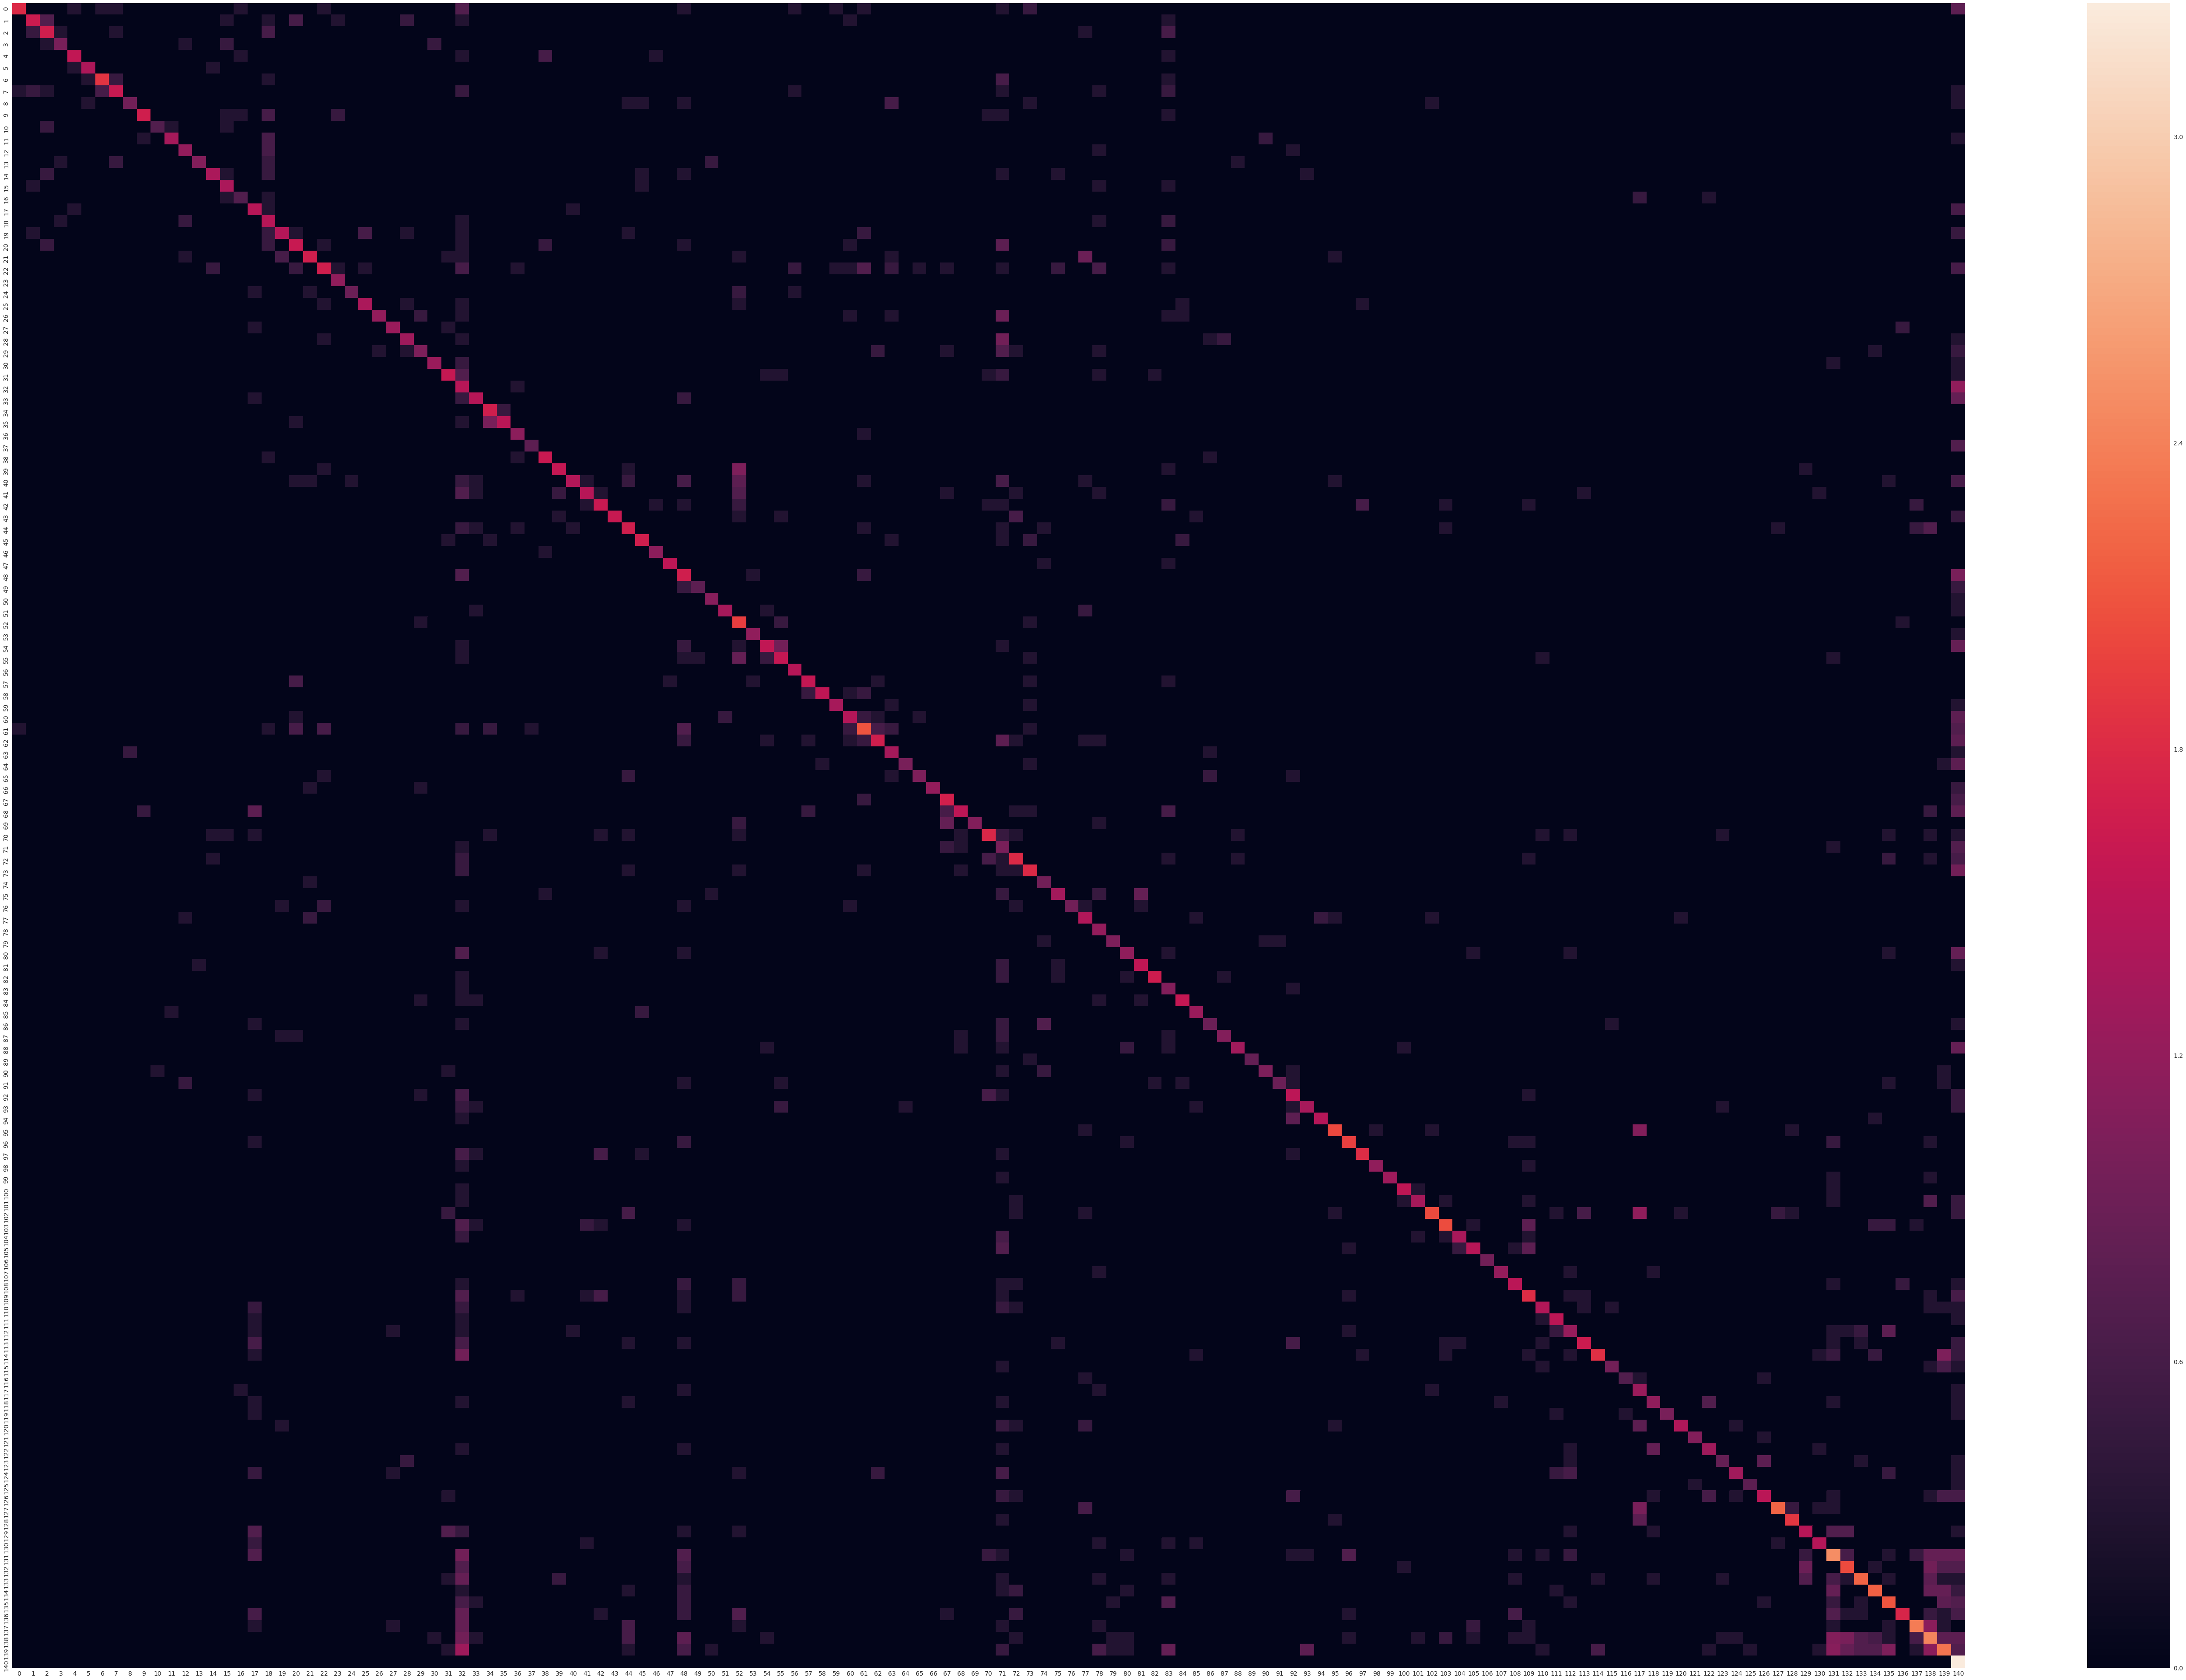

In [24]:
df_cm = pd.DataFrame(np.log10(np.add(test_conf_mats[3],1)))
plt.figure(figsize = (100,70))
sn.set(font_scale=1.4)#for label size
# sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size
sn.heatmap(df_cm)